## IMPORT LIBRARY


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## CONVERT FROM BGR to RGB

In [35]:
image_path = 'daunmangga.jpeg'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

## CONVERT TO GRAYSCALE

In [4]:
gray_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

## APPLY THRESHOLDING TO CREATE A BINARY IMAGE

In [5]:
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

## FIND CONTOURS

In [10]:
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

## CREATE EMPTY MASK FOR THE MANGO AND LEAVES

In [11]:
mask_mango = np.zeros_like(gray_image)
mask_leave = np.zeros_like(gray_image)

## ASSUME THE LARGEST CONTOUR IS THE MANGO AND OTHERS ARE LEAVES

In [14]:
largest_contour = max(contours, key=cv2.contourArea)
cv2.drawContours(mask_mango, [largest_contour], -1, 255, thickness=cv2.FILLED)

for contour in contours:
    if contour is not largest_contour:
        cv2.drawContours(mask_leave, [contour], -1, 255, thickness=cv2.FILLED)

## SEGMENT THE MANGO AND LEAVE USING THE MASK

In [15]:
segmented_mango = cv2.bitwise_and(original_image, original_image, mask=mask_mango)
segmented_leave = cv2.bitwise_and(original_image, original_image, mask=mask_leave)

## DISPLAY THE RESULT

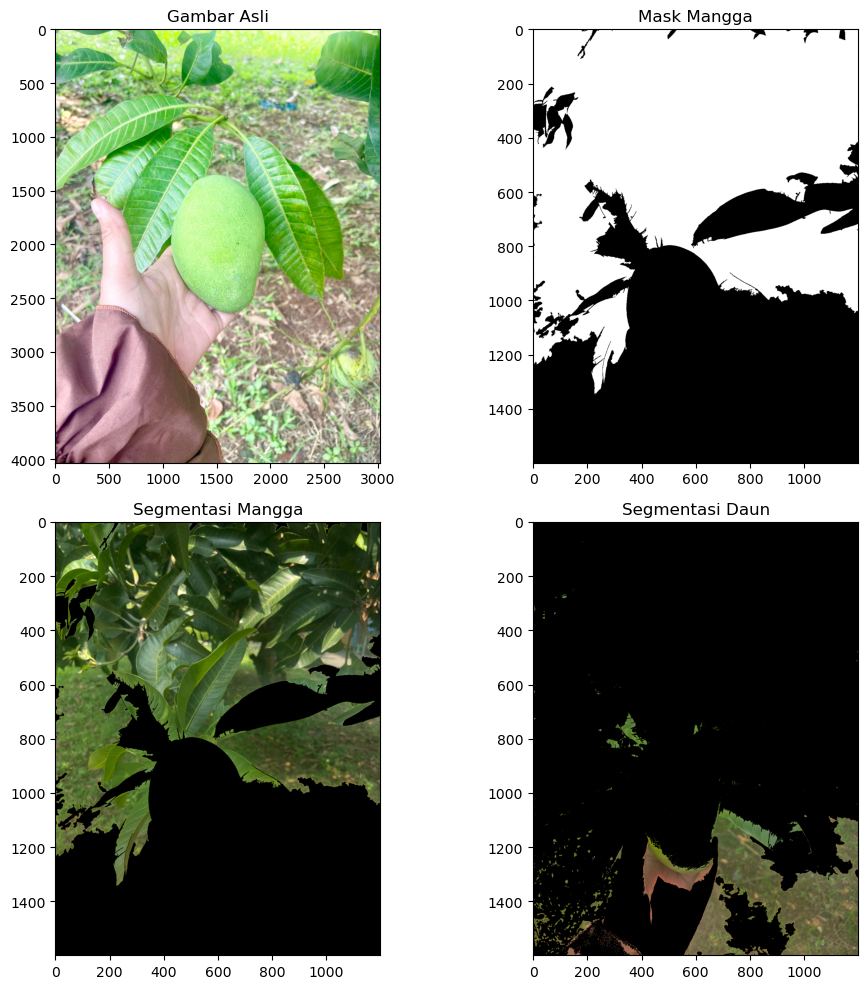

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(original_image)
axes[0, 0].set_title('Gambar Asli')

axes[0, 1].imshow(mask_mango, cmap='gray')
axes[0, 1].set_title('Mask Mangga')

axes[1, 0].imshow(segmented_mango)
axes[1, 0].set_title('Segmentasi Mangga')

axes[1, 1].imshow(segmented_leave)
axes[1, 1].set_title('Segmentasi Daun')

plt.tight_layout()
plt.show()
                  